In [21]:
import numpy as np
from sklearn.datasets import load_sample_image

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

/Users/home/.pyenv/versions/3.6.3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/home/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [25]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(42)

In [12]:
china = load_sample_image("china.jpg")

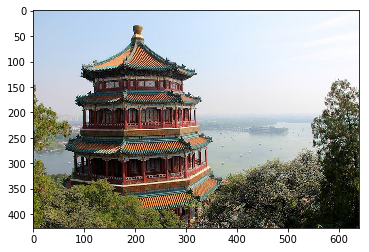

In [17]:
plt.imshow(china)

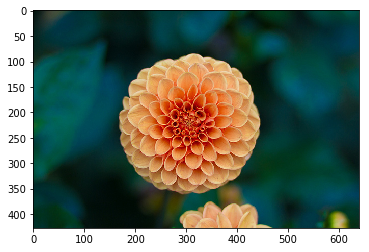

In [18]:
flower = load_sample_image("flower.jpg")
plt.imshow(flower)

In [19]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
batch_size, height, width, channels

(2, 427, 640, 3)

In [22]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1 #縦線
filters[:,3,:,1] = 1 #横線

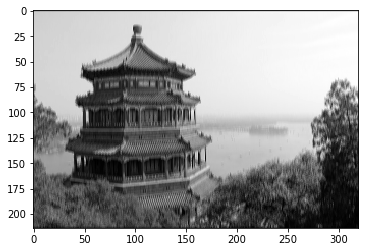

In [24]:
X = tf.placeholder(dtype=tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

In [26]:
reset_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, height, width, channels))
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

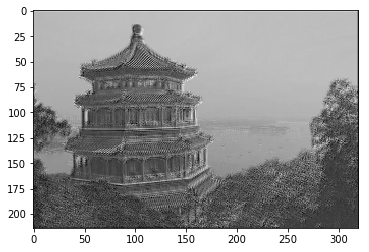

In [27]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X:dataset})
    
plt.imshow(output[0, :, :, 1],cmap='gray')
plt.show()

# Pooling layer

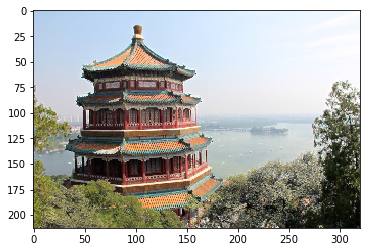

In [30]:
X = tf.placeholder(dtype=tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()